<a href="https://colab.research.google.com/github/Mohammedafaounodden/Python-/blob/master/Retail_Consumer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
!pip install apyori
from apyori import apriori
import io
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from matplotlib import pylab as plt


  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=70efa386fa7b4cf98513fc6743668c970b89e471cd7a3afd5bc4f4fb3572ace5
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
df = drive.CreateFile({'id':'0B5oTkEEfT1IkRVNBa1FmdFlUc2RfTnJZVF8tNEE3aFM0N3lz'}) # replace the id with id of file you want to access
df.GetContentFile('retailfinal.csv') 

In [6]:
import pandas as pd
df = pd.read_csv('retailfinal.csv') 
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


# New Section

In [ ]:
df= pd.read_csv(io.StringIO(uploaded['retailfinal.csv'].decode('utf-8')))
# dont use it when you are uploading data from google drive 

In [ ]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [7]:
# List of a questions to be found out after EDA . 
# 1. find the most frequent purchases , find the most frequent occurances (using apriory ) 
# 2. find the best average bill amount 
# 3. The items bought in most quantity . Best selling items 
# 3.1 The type of a particular product sold each month .  and plot it in a graph . 
# 4.  Find the connection between the most frequent items and their prices .
# 5.  The item which brings in the most cash 
# 5.1  The dates which have the maximum quantity of products sold  and the coorelation between those dates . 
# 5.2 The countries with the highest quantity of products sold in total .  
# 6. Best selling item in each Country . 
# 7. 1st before even touching the data check what do we actualy want from the data , then see the things which we can actually get from this data 
#    only then do the analysis . if you open the data then try to connect the dots looking at the table ,it will mostly lead to confusion ,  so the data you  
#    are working on  read articles and ressearch papers and other analysis on know the Stake holders , Ask the necessary Questions to be answered that data only then start the 
#    Process to Visualise .  
# Resources used 
#https://stackoverflow.com/questions/47276071/how-to-install-extra-packages-in-google-colaboratorys-vm
#https://www.youtube.com/watch?v=fPufVcItDzs
#https://www.datacamp.com/community/tutorials/market-basket-analysis-r
#https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/
#https://intellipaat.com/blog/data-science-apriori-algorithm/


In [ ]:
cdf['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
114381,566231,23082,SET 6 PAPER TABLE LANTERN HEARTS,6,3.75,14837.0,United Kingdom
114382,566231,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,12,0.85,14837.0,United Kingdom
114383,566231,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,0.55,14837.0,United Kingdom
114384,566231,22142,CHRISTMAS CRAFT WHITE FAIRY,12,1.45,14837.0,United Kingdom


In [9]:
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket
# Filtering the Data for country france and grouping by Invoice number and Description of items along with the Quantity .  

Description,DOLLY GIRL BEAKER,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE WOODLAND,3D VINTAGE CHRISTMAS STICKERS,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,60 CAKE CASES DOLLY GIRL DESIGN,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ABC TREASURE BOOK BOX,AGED GLASS SILVER T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE WORLD CHAMPION,ALARM CLOCK BAKELIKE CHOCOLATE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,...,VINTAGE RED ENAMEL TRIM JUG,VINTAGE RED ENAMEL TRIM MUG,VINTAGE RED ENAMEL TRIM PLATE,VINTAGE RED TRIM ENAMEL BOWL,VINTAGE SEASIDE JIGSAW PUZZLES,VINTAGE UNION JACK DOORSTOP,WALL TIDY RETROSPOT,WATERING CAN BLUE ELEPHANT,WATERING CAN GREEN DINOSAUR,WATERING CAN PINK BUNNY,WELCOME WOODEN BLOCK LETTERS,WHITE BAMBOO RIBS LAMPSHADE,WHITE HEART CONFETTI IN TUBE,WHITE SPOT RED CERAMIC DRAWER KNOB,WICKER WREATH LARGE,WOOD BLACK BOARD ANT WHITE FINISH,WOOD STAMP SET HAPPY BIRTHDAY,WOODEN BOX OF DOMINOES,WOODEN CROQUET GARDEN SET,WOODEN HAPPY BIRTHDAY GARLAND,WOODEN ROUNDERS GARDEN SET,WOODEN SCHOOL COLOURING SET,WOODEN SKITTLES GARDEN SET,WOODLAND HEIGHT CHART STICKERS,WOODLAND STICKERS,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND PARTY BAG + STICKER SET,WOODLAND STORAGE BOX LARGE,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP 50'S CHRISTMAS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP RED APPLES,WRAP SUKI AND FRIENDS,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536370,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
     
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

basket_sets

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE WOODLAND,3D VINTAGE CHRISTMAS STICKERS,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,60 CAKE CASES DOLLY GIRL DESIGN,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ABC TREASURE BOOK BOX,AGED GLASS SILVER T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE WORLD CHAMPION,ALARM CLOCK BAKELIKE CHOCOLATE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,ALARM CLOCK BAKELIKE ORANGE,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,...,VINTAGE RED ENAMEL TRIM JUG,VINTAGE RED ENAMEL TRIM MUG,VINTAGE RED ENAMEL TRIM PLATE,VINTAGE RED TRIM ENAMEL BOWL,VINTAGE SEASIDE JIGSAW PUZZLES,VINTAGE UNION JACK DOORSTOP,WALL TIDY RETROSPOT,WATERING CAN BLUE ELEPHANT,WATERING CAN GREEN DINOSAUR,WATERING CAN PINK BUNNY,WELCOME WOODEN BLOCK LETTERS,WHITE BAMBOO RIBS LAMPSHADE,WHITE HEART CONFETTI IN TUBE,WHITE SPOT RED CERAMIC DRAWER KNOB,WICKER WREATH LARGE,WOOD BLACK BOARD ANT WHITE FINISH,WOOD STAMP SET HAPPY BIRTHDAY,WOODEN BOX OF DOMINOES,WOODEN CROQUET GARDEN SET,WOODEN HAPPY BIRTHDAY GARLAND,WOODEN ROUNDERS GARDEN SET,WOODEN SCHOOL COLOURING SET,WOODEN SKITTLES GARDEN SET,WOODLAND HEIGHT CHART STICKERS,WOODLAND STICKERS,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND PARTY BAG + STICKER SET,WOODLAND STORAGE BOX LARGE,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP 50'S CHRISTMAS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP RED APPLES,WRAP SUKI AND FRIENDS,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565930,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
565931,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
566074,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.04, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
# Subset of a frequent itemset is a frequent itemset . 

In [ ]:
rules[ (rules['lift'] >= 6) &
      (rules['confidence'] >= 0.8) ]

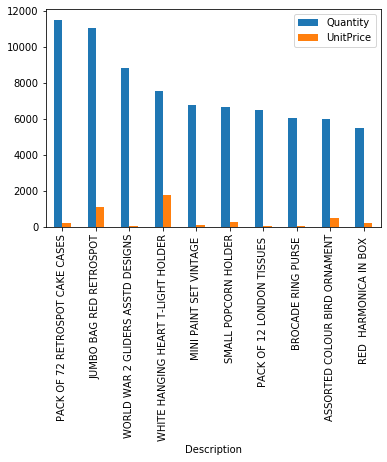

In [ ]:
group=df.drop(['CustomerID'], axis=1).groupby(['Description']).sum().reset_index()
group.nlargest(10, 'Quantity').set_index('Description').plot(kind='bar')
#group=df.groupby(['Description'])['Quantity'].sum().reset_index()  what quantity does is after groupby description it prints only quantity values . 
#group.nlargest(10, 'Quantity').set_index('Description')

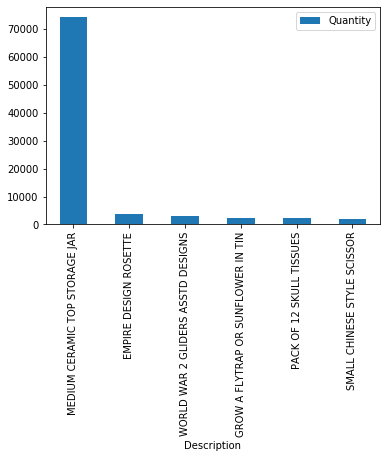

In [ ]:
df.drop(['CustomerID','UnitPrice'] , axis=1).nlargest(6, 'Quantity').set_index('Description').plot(kind='bar')
# 1 means the 1st largest value of Quantity is given . 
# it says that the max quanitity is 34363, 17262 , 116275

In [ ]:
df.sort_values('Quantity', ascending=False).head()
# 1 means the row with the highest Quantity 
# shows max quaNtity in bought by a user 

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
56748,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,12346.0,United Kingdom
65633,544612,22053,EMPIRE DESIGN ROSETTE,3906,0.82,18087.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,0.18,16754.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,0.94,16029.0,United Kingdom
67816,547037,21967,PACK OF 12 SKULL TISSUES,2160,0.25,14101.0,United Kingdom


In [ ]:
#https://www.youtube.com/watch?v=SshJzYcya6o   python pandas aggregate
# https://www.youtube.com/watch?v=2AFGPdNn4FM  filter rows by particular colums values 
#  https://stackoverflow.com/questions/44728061/get-top-n-values-per-category-in-pandas-retaining-all-columns  max , min of quantity 
#g=df.groupby('Description').Quantity.max().reset_index(). if max removed from the down then it shows all the max quanities for each items 
#g.Quantity.max() shows max quanitit bought by the user i.e 74215 
# df[df['Country'] =="United Kingdom "] to sort by countries . ther
# Use sort by instead of groupby
#
# reset_index() arranges the the data which comes out in form of a table 
# Selects the Numbers of Products Bought by different people 
# Therefore the most liked product with people ,  not the product which sell the most but the the one bought by most people  
# arrange by the description bringing the most revenue . 


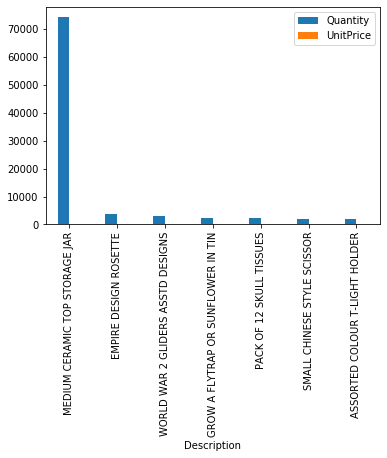

In [ ]:
 top_7_Quant = df.drop(['CustomerID'], axis=1).nlargest(7, 'Quantity').set_index('Description').plot(kind='bar')

# shows the amount of items sold 
#drop columns should be in beginning 


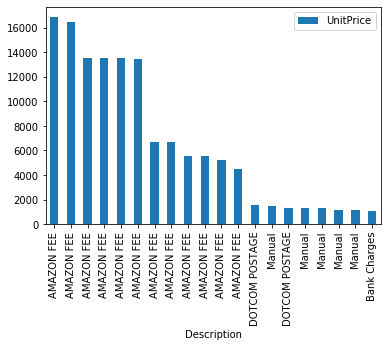

In [ ]:
df[df.UnitPrice >= 1000].drop(['CustomerID','Quantity'] , axis=1).sort_values('UnitPrice', ascending=False).set_index('Description').plot(kind='bar')


In [ ]:
df[df.UnitPrice >= 1000]['Description'].reset_index()
# Unit price prints the rows with unit price above 1000 but doesnt mean it will actually print the unit price column . 
# It will print the INDEX and the colum Specified in the square brackets 
# Takes all Rows where Unit price is greater than 1000 and displays only Index and Description column 
# This is same as d.loc[df.UnitPrice>=1000,'Description'].reset_index()

,index,Description
0,15017,AMAZON FEE
1,41448,Manual
2,91334,DOTCOM POSTAGE
3,109874,DOTCOM POSTAGE


In [ ]:
df.nlargest(10, 'UnitPrice').set_index('Description')
# what happens is to plot the histogram what we do is the plot function plots using INDEX you set, so the index we set is plotted on the X axis .
# So first i am arranging the unit price in top 10 values then making the index as unit prices so what we get is unit price column in ascending order.  
# groupby rephrase as For Each 
#reset_index dosent work with groupby so use head() instead || Ascending also dosenty work with groupby 

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country
Description,,,,,,
AMAZON FEE,537632,AMAZONFEE,1,13541.33,NaN,United Kingdom
DOTCOM POSTAGE,565847,DOT,1,1569.04,NaN,United Kingdom
DOTCOM POSTAGE,564221,DOT,1,1325.00,NaN,United Kingdom
Manual,539856,M,1,1298.40,NaN,United Kingdom
DOTCOM POSTAGE,537434,DOT,1,950.99,NaN,United Kingdom
DOTCOM POSTAGE,537240,DOT,1,940.87,NaN,United Kingdom
Manual,537534,M,1,924.59,NaN,United Kingdom
DOTCOM POSTAGE,538349,DOT,1,907.47,NaN,United Kingdom
DOTCOM POSTAGE,536876,DOT,1,887.52,NaN,United Kingdom


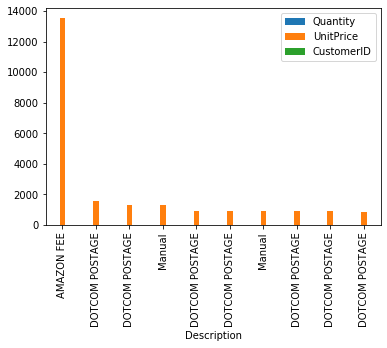

In [ ]:
df.nlargest(10, 'UnitPrice').set_index('Description').plot(kind='bar')
# Arranging the top 10 highest Unit price and then setting the x axis as description so all the products get plotted on x axis  .  Basically whatever have to find
# make it set_index  . Ex : The top 10 Unit prices . Arrange top then then find the set index by trial and error

In [ ]:
france = df[df.Country =='France'].nlargest(10, 'Quantity').set_index('Description')
france.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country
Description,,,,,,
RABBIT NIGHT LIGHT,564897,23084,288,1.79,12678.0,France
JUMBO BAG STRAWBERRY,548496,85099F,200,1.79,12678.0,France
JUMBO BAG PINK POLKADOT,548496,22386,200,1.79,12678.0,France
FELT FARM ANIMAL WHITE BUNNY,539407,22264,192,0.19,12726.0,France
ASSORTED COLOUR BIRD ORNAMENT,548409,84879,160,1.45,12731.0,France


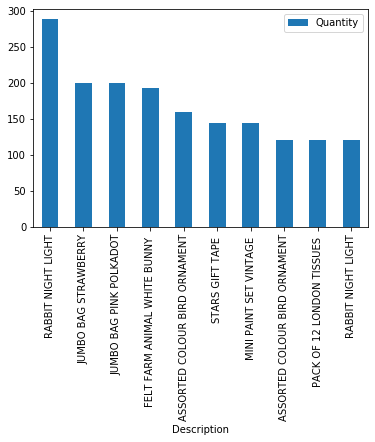

In [ ]:
# to display the products sold in france . it is grouped by the country france  . highets selling products in france .
#dict(list(df.groupby('Country')))['France']
france_data=dict(list(df.groupby('Country')))['France'].nlargest(10, 'Quantity').set_index('Description')
france_data.drop(['CustomerID' , 'UnitPrice', 'StockCode','InvoiceNo'], axis=1).plot(kind='bar')

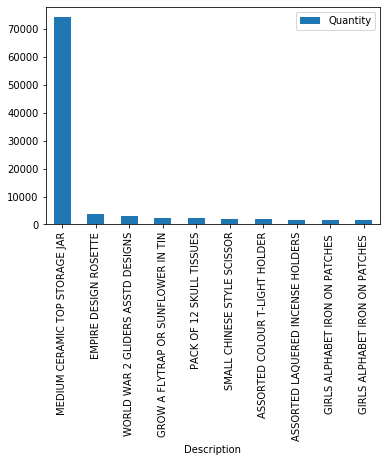

In [ ]:
#dict(list(df.groupby('Country')))['United Kingdom']  table to display UK data 
uk_data=dict(list(df.groupby('Country')))['United Kingdom'].nlargest(10, 'Quantity').set_index('Description')
uk_data.drop(['CustomerID' , 'UnitPrice', 'StockCode','InvoiceNo'], axis=1).plot(kind='bar')

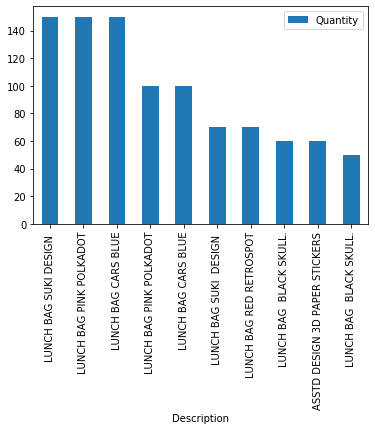

In [ ]:
#dict(list(df.groupby('Country')))['Spain']
spain_data=dict(list(df.groupby('Country')))['Spain'].nlargest(10, 'Quantity').set_index('Description')
spain_data.drop(['CustomerID' , 'UnitPrice', 'StockCode','InvoiceNo'], axis=1).plot(kind='bar')


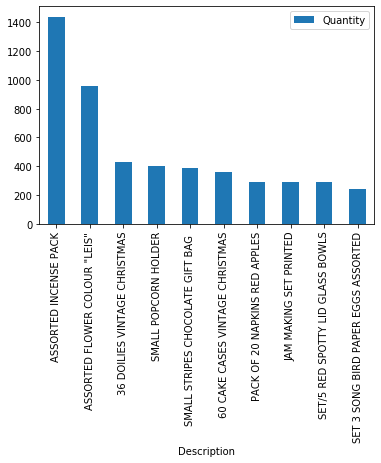

In [ ]:
#dict(list(df.groupby('Country')))['EIRE']
eire_data=dict(list(df.groupby('Country')))['EIRE'].nlargest(10, 'Quantity').set_index('Description')
eire_data.drop(['CustomerID' , 'UnitPrice', 'StockCode','InvoiceNo'], axis=1).plot(kind='bar')

In [ ]:
dict(list(df.groupby('Country')))['Germany']


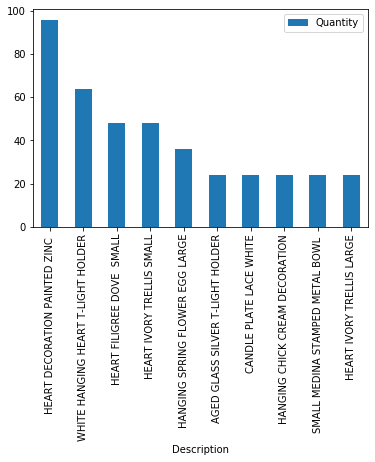

In [ ]:
dict(list(df.groupby('Country')))['Cyprus']
cyprus_data=dict(list(df.groupby('Country')))['Cyprus'].nlargest(10, 'Quantity').set_index('Description')
cyprus_data.drop(['CustomerID' , 'UnitPrice', 'StockCode','InvoiceNo'], axis=1).plot(kind='bar')